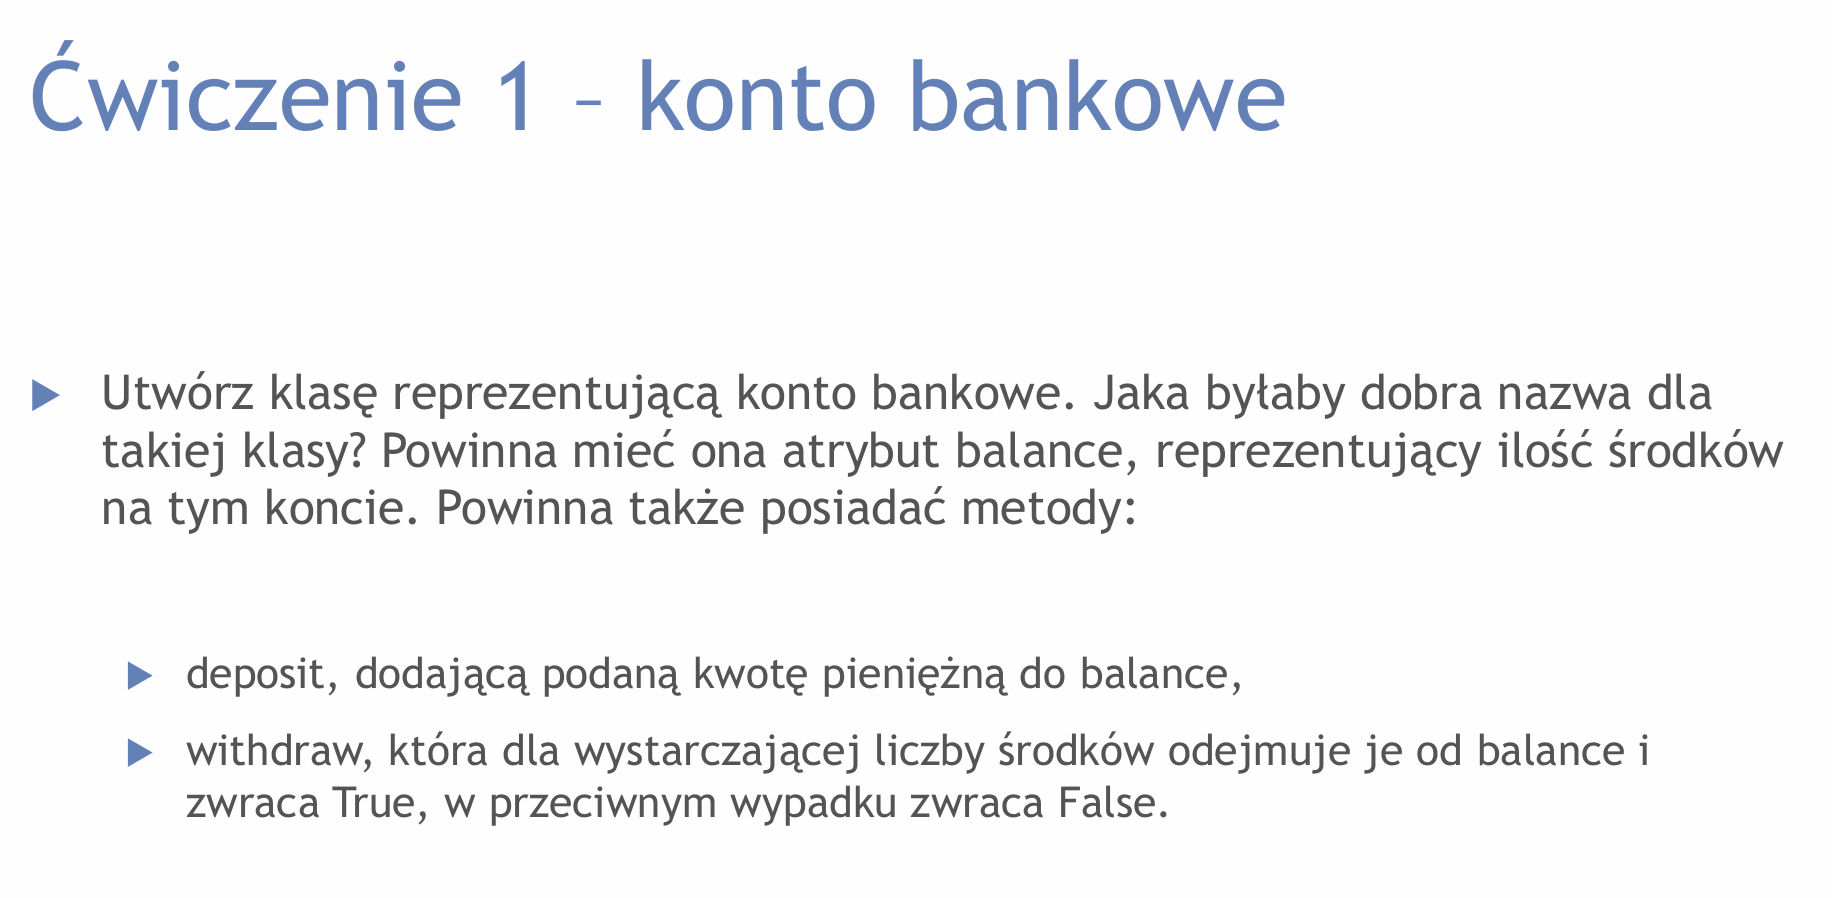

In [23]:
class Account:
    def __init__(self, owner, balance=0):
        self.owner = owner
        self.balance = balance

    def deposit(self, amount):
        self.balance += amount
        print(f"Deposit of {amount} accepted. New balance: {self.balance}")

    def withdraw(self, amount):
        if amount > self.balance:
            return False
        else:
            self.balance -= amount
            return True

acc1 = Account("Artur", 1000)
print(acc1.owner)
print(acc1.balance)
acc1.deposit(252)
print(acc1.withdraw(3000))
print(acc1.withdraw(252))
print(acc1.balance)


Artur
1000
Deposit of 252 accepted. New balance: 1252
False
True
1000


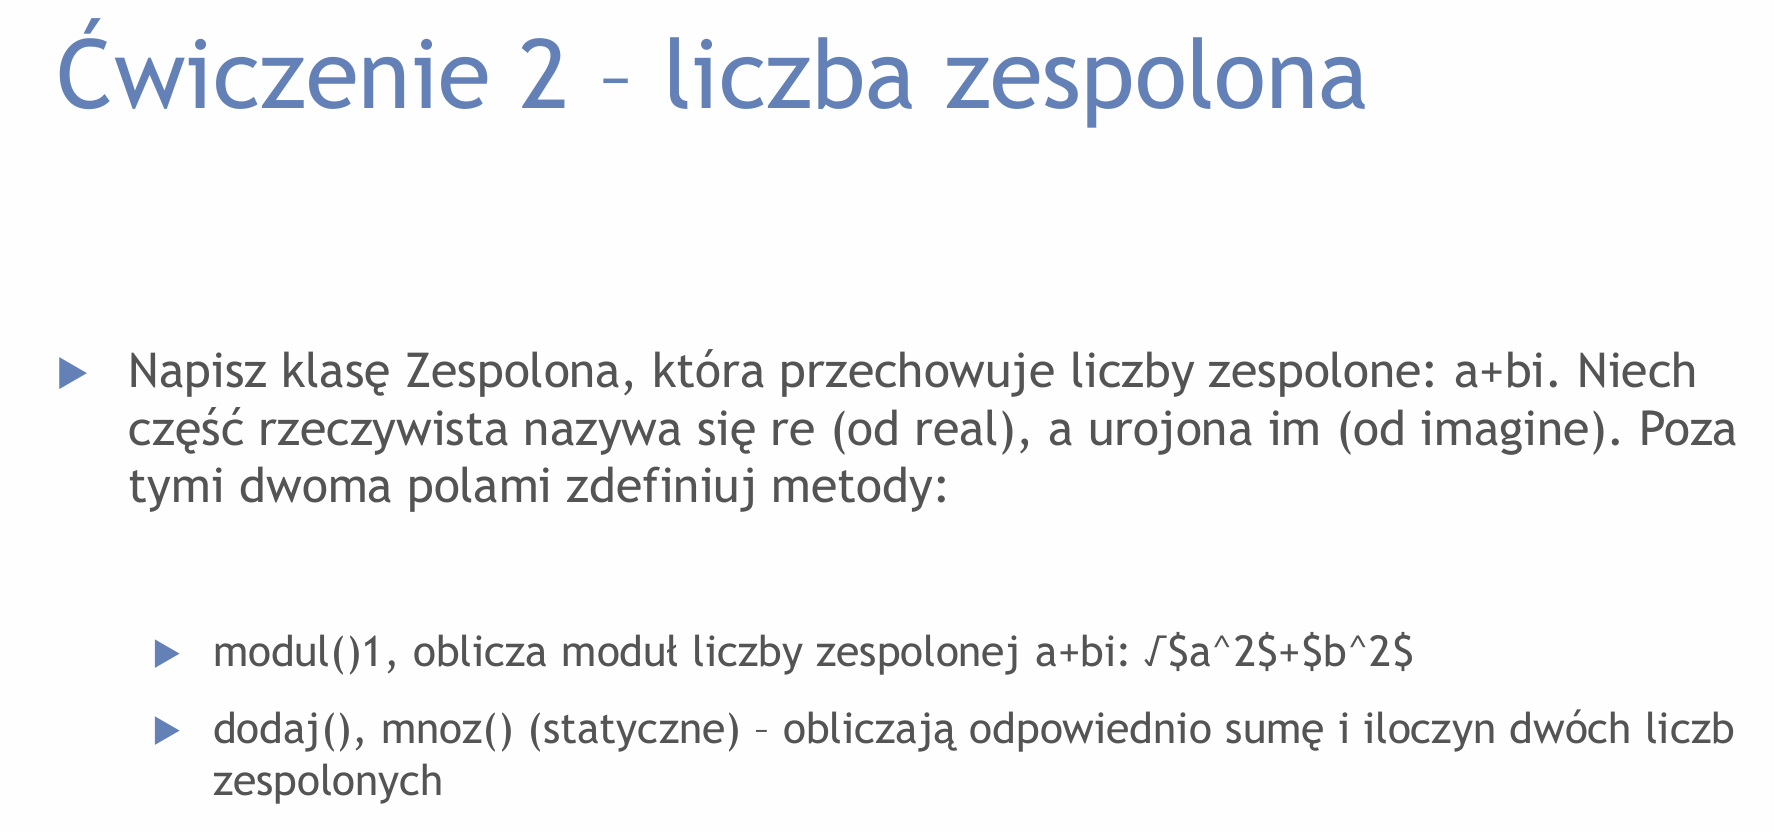

In [24]:
import math

class Zespolona:
    def __init__(self, re=0.0, im=0.0):
        self.re = re
        self.im = im

    def __str__(self):
        znak = '+' if self.im >= 0 else '-'
        return f"{self.re} {znak} {abs(self.im)}i"

    def modul(self):
        return math.sqrt(self.re ** 2 + self.im ** 2)

    @staticmethod
    def dodaj(z1, z2):
        return Zespolona(z1.re + z2.re, z1.im + z2.im)

    @staticmethod
    def mnoz(z1, z2):
        re = z1.re * z2.re - z1.im * z2.im
        im = z1.re * z2.im + z1.im * z2.re
        return Zespolona(re, im)


if __name__ == "__main__":
    z1 = Zespolona(3, 4)
    z2 = Zespolona(1, -2)

    print(f"z1 = {z1}")
    print(f"z2 = {z2}")
    print(f"Moduł z1: {z1.modul():.2f}")

    suma = Zespolona.dodaj(z1, z2)
    iloczyn = Zespolona.mnoz(z1, z2)

    print(f"Suma: {suma}")
    print(f"Iloczyn: {iloczyn}")


z1 = 3 + 4i
z2 = 1 - 2i
Moduł z1: 5.00
Suma: 4 + 2i
Iloczyn: 11 - 2i


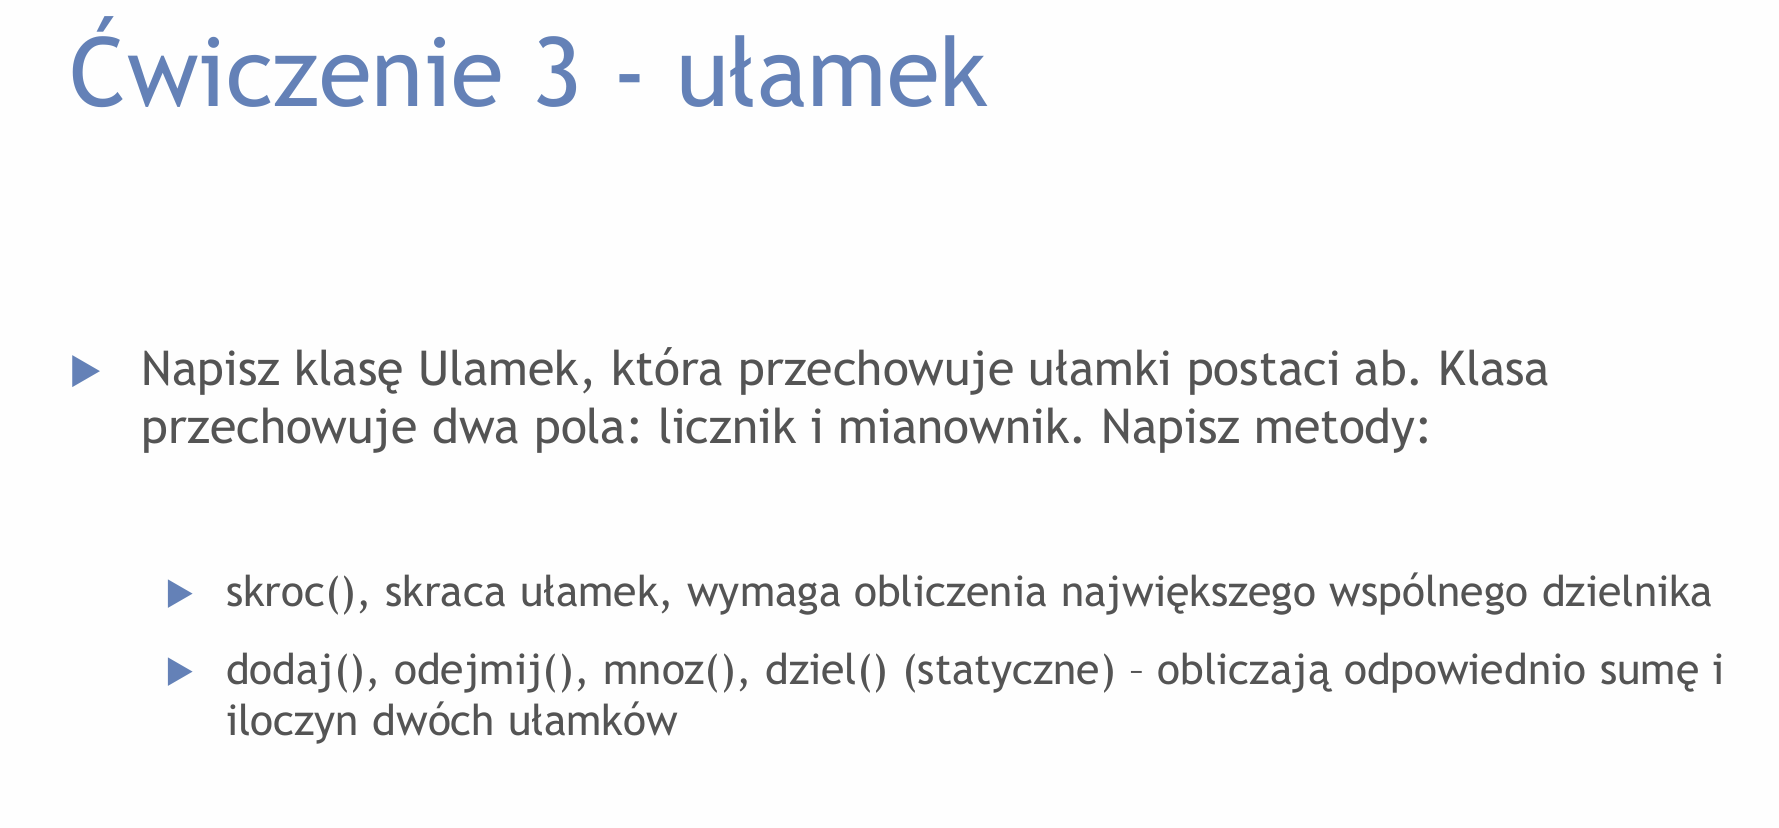

In [25]:

class Ulamek:
    def __init__(self, licznik, mianownik):
        if mianownik == 0:
            raise ValueError("Mianownik nie może być zerem!")
        self.licznik = licznik
        self.mianownik = mianownik
        self.skroc()

    def skroc(self):
        nwd = math.gcd(self.licznik, self.mianownik)
        self.licznik //= nwd
        self.mianownik //= nwd

        if self.mianownik < 0:
            self.licznik *= -1
            self.mianownik *= -1

    def __str__(self):
        return f"{self.licznik}/{self.mianownik}"

    @staticmethod
    def dodaj(u1, u2):
        licznik = u1.licznik * u2.mianownik + u2.licznik * u1.mianownik
        mianownik = u1.mianownik * u2.mianownik
        return Ulamek(licznik, mianownik)

    @staticmethod
    def odejmij(u1, u2):
        licznik = u1.licznik * u2.mianownik - u2.licznik * u1.mianownik
        mianownik = u1.mianownik * u2.mianownik
        return Ulamek(licznik, mianownik)

    @staticmethod
    def mnoz(u1, u2):
        licznik = u1.licznik * u2.licznik
        mianownik = u1.mianownik * u2.mianownik
        return Ulamek(licznik, mianownik)

    @staticmethod
    def dziel(u1, u2):
        if u2.licznik == 0:
            raise ZeroDivisionError("Nie można dzielić przez 0")
        licznik = u1.licznik * u2.mianownik
        mianownik = u1.mianownik * u2.licznik
        return Ulamek(licznik, mianownik)


a = Ulamek(1, 2)
b = Ulamek(3, 4)

print("a =", a)
print("b =", b)
print("a + b =", Ulamek.dodaj(a, b))
print("a - b =", Ulamek.odejmij(a, b))
print("a * b =", Ulamek.mnoz(a, b))
print("a / b =", Ulamek.dziel(a, b))



a = 1/2
b = 3/4
a + b = 5/4
a - b = -1/4
a * b = 3/8
a / b = 2/3


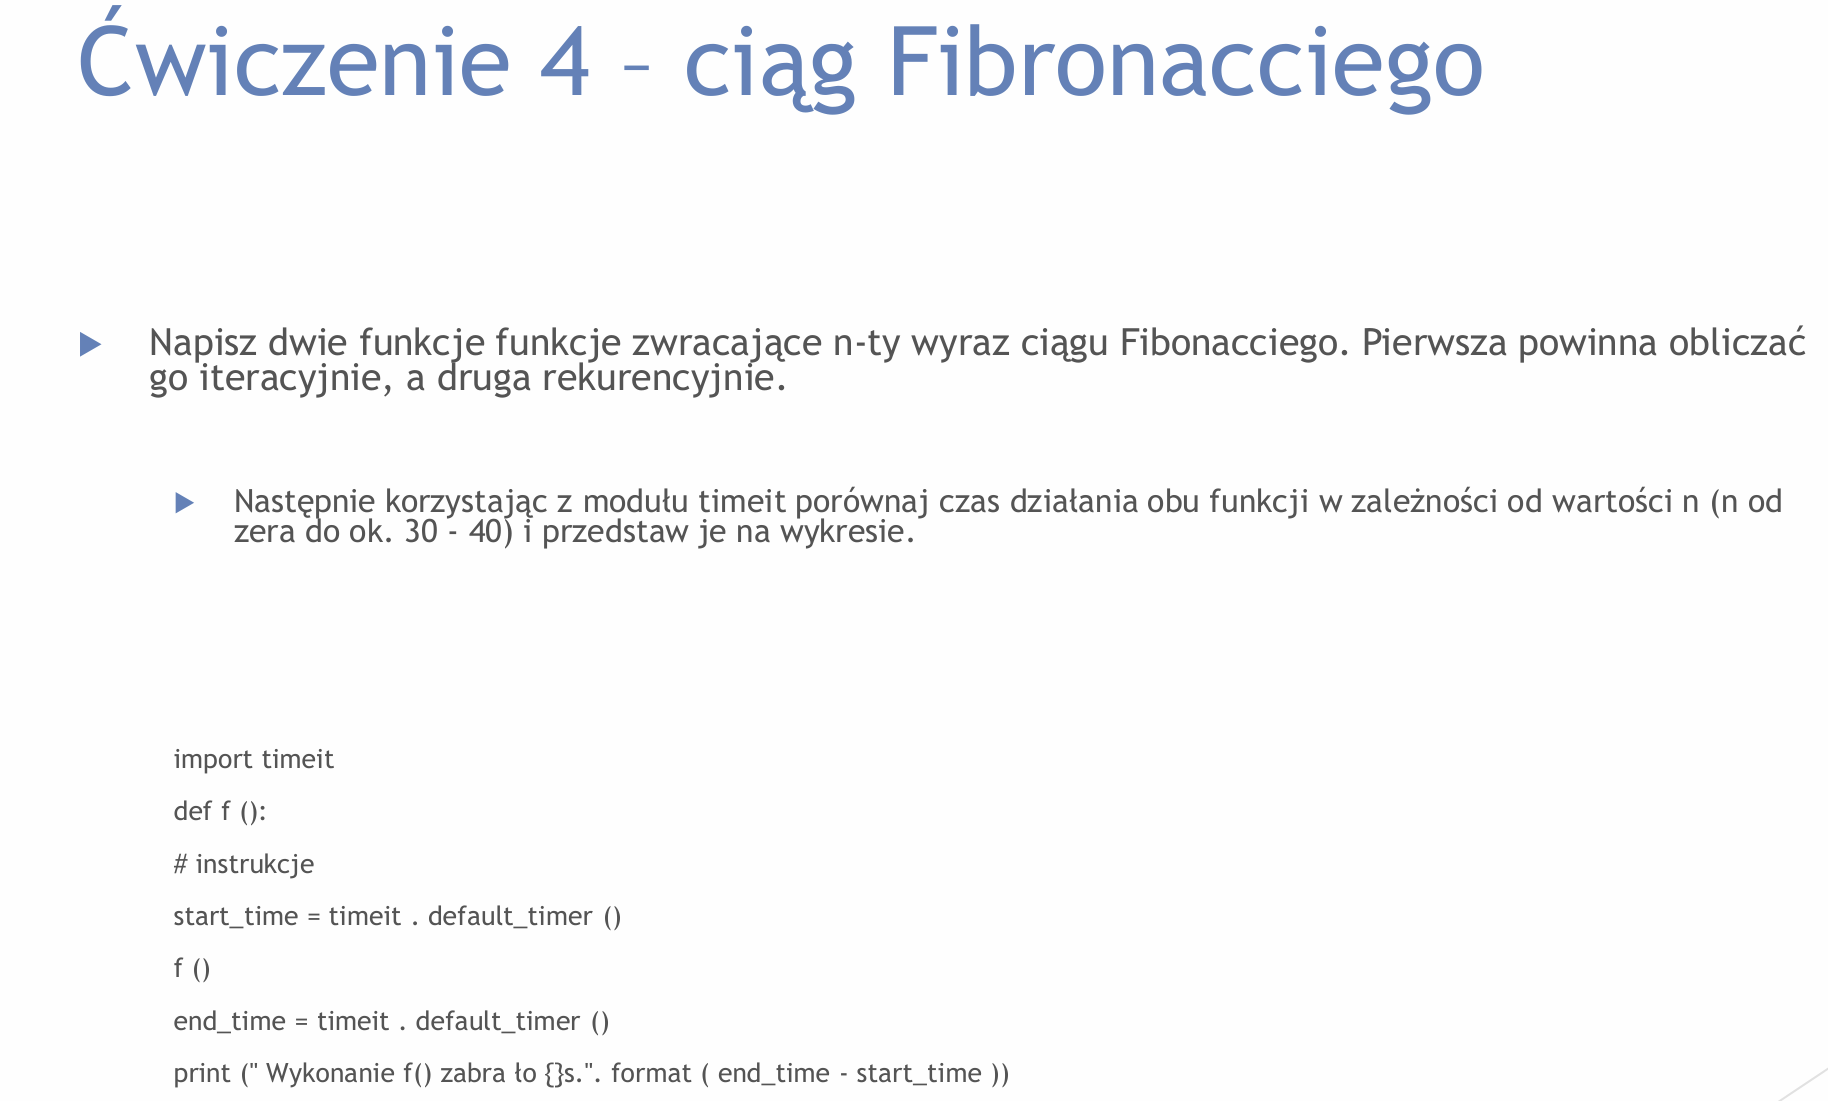

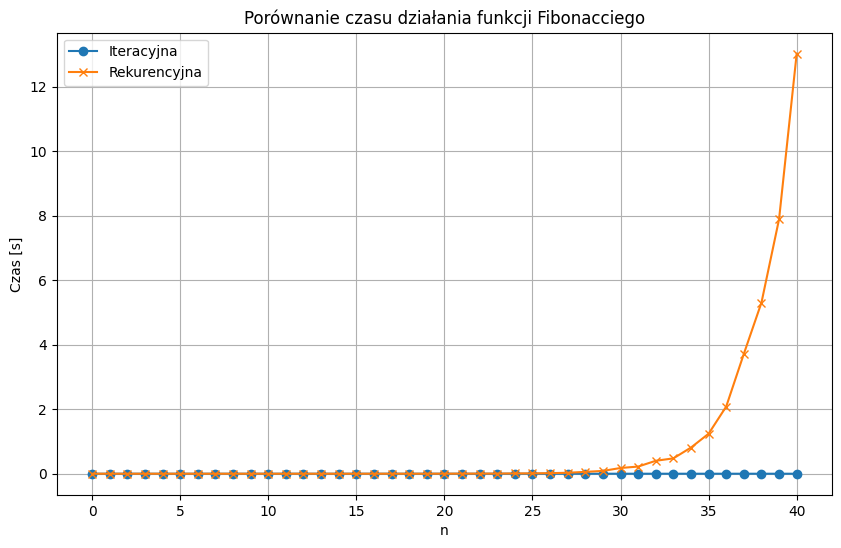

In [26]:
import timeit
import matplotlib.pyplot as plt

def fib_iter(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b


def fib_rec(n):
    if n <= 1:
        return n
    return fib_rec(n - 1) + fib_rec(n - 2)

ns = list(range(0, 41))
times_iter = []
times_rec = []

for n in ns:
    t_iter = timeit.timeit(lambda: fib_iter(n), number=1)
    times_iter.append(t_iter)

    t_rec = timeit.timeit(lambda: fib_rec(n), number=1)
    times_rec.append(t_rec)


# --------------------------------------------- Wykres porównujący czasy ---

plt.figure(figsize=(10, 6))
plt.plot(ns, times_iter, label="Iteracyjna", marker="o")
plt.plot(ns, times_rec, label="Rekurencyjna", marker="x")
plt.title("Porównanie czasu działania funkcji Fibonacciego")
plt.xlabel("n")
plt.ylabel("Czas [s]")
plt.legend()
plt.grid(True)
plt.show()
